## Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download titanic data
df_titanic = sns.load_dataset("titanic")
df_titanic.info()
display(df_titanic)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [3]:
# The data had some missing so using average of a set of numbers to fill the missing data

df_titanic = df_titanic.fillna({'age' : df_titanic['age'].mean()})
update_data = df_titanic.copy()
update_data.info()
display(update_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male deck  embark_town alive  alone  
0     Third    man        True  NaN  Southampton    no  False  
1     First  woman       False    C    Cherbourg   yes  False  
2     Third  woman       False  NaN  Southampton   yes   True  
3     First  woman       False    C  Southampton   yes  False  
4     Third    man        True  NaN  Southampton    no   True  
..      ...    ...         ...  ...          ...   ...    ...  
886  Second    man        True  NaN  Southampton    no   True  
887   First  woman       False    B  Southampton   yes   True  
888   Third  woman       False  NaN  Southampton    no  False  
889   First    man        True    C    Cherbourg   yes   True  
890   Third    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

## Create the database 

### put update_data copy to database

In [4]:
import sqlite3

# --- Database Setup ---
db_file = "titanic_data.db"
conn = sqlite3.connect(db_file)
cursor = conn.cursor()
cursor.execute('''
    CREATE TABLE IF NOT EXISTS titanic_info (
        survived char(2) PRIMARY KEY,
        pclass char(2),
        sex varchar(10),
        age varchar(20),
        sibsp char(2),
        parch char(2),
        fare varchar(20),
        embarked char(2),
        class varvhar(10),
        adult_male varchar(10),
        deck varchar(10),
        embark_town varchar(20),
        alive varchar(5),
        alone varchar(10)
    )
''')
conn.commit()

updata_data.to_sql('titanic_info', con=conn, index=False, if_exists='replace')
statement = "SELECT * FROM titanic_info"
database_titanic = pd.read_sql_query(statement, conn)
database_titanic

survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  22.000000      1      0   7.2500        S   
1           1       1  female  38.000000      1      0  71.2833        C   
2           1       3  female  26.000000      0      0   7.9250        S   
3           1       1  female  35.000000      1      0  53.1000        S   
4           0       3    male  35.000000      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
886         0       2    male  27.000000      0      0  13.0000        S   
887         1       1  female  19.000000      0      0  30.0000        S   
888         0       3  female  29.699118      1      2  23.4500        S   
889         1       1    male  26.000000      0      0  30.0000        C   
890         0       3    male  32.000000      0      0   7.7500        Q   

      class    who  adult_male  deck  embark_town alive  alone  
0     Third    man           1  None  Southampton    no      0  
1     First  woman           0     C    Cherbourg   yes      0  
2     Third  woman           0  None  Southampton   yes      1  
3     First  woman           0     C  Southampton   yes      0  
4     Third    man           1  None  Southampton    no      1  
..      ...    ...         ...   ...          ...   ...    ...  
886  Second    man           1  None  Southampton    no      1  
887   First  woman           0     B  Southampton   yes      1  
888   Third  woman           0  None  Southampton    no      0  
889   First    man           1     C    Cherbourg   yes      1  
890   Third    man           1  None   Queenstown    no      1  

[891 rows x 15 columns]

## Create the Datalist

In [5]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_classification

In [6]:
random_seed = 123

In [7]:
# make_classification
x1, y1 = make_classification(
        n_samples=100,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        n_clusters_per_class=1,
        random_state=random_seed
)

In [8]:
# make_moons
x2, y2 = make_moons(
        n_samples=100,
        noise=0.05,
        random_state=random_seed
)

In [9]:
# make_circles
x3, y3 = make_circles(
        n_samples=100,
        noise=0.02,
        random_state=random_seed
)

In [10]:
DataList = [(x1, y1), (x2, y2), (x3, y3)]
N = len(DataList)
display(N)

3

### Using three catagory of Fare, Age and Pclass to infer whether the object is male or female

In [11]:
statement_1 = "SELECT fare, age, pclass, sex from titanic_info"
item_1 = pd.read_sql_query(statement_1, conn)
item_1

fare        age  pclass     sex
0     7.2500  22.000000       3    male
1    71.2833  38.000000       1  female
2     7.9250  26.000000       3  female
3    53.1000  35.000000       1  female
4     8.0500  35.000000       3    male
..       ...        ...     ...     ...
886  13.0000  27.000000       2    male
887  30.0000  19.000000       1  female
888  23.4500  29.699118       3  female
889  30.0000  26.000000       1    male
890   7.7500  32.000000       3    male

[891 rows x 4 columns]

In [12]:
X = item_1.drop('sex', axis=1)
y = item_1['sex']

### Using function of draw the best Decision Boundary

In [13]:
from sklearn.model_selection import train_test_split

def plot_boundary(ax, x, y, algorithm):
    x_train, x_test, y_train, y_test = train_test_split(x, y,
            test_size=0.5, random_state=random_seed)
    
    from matplotlib.colors import ListedColormap
    cmap1 = plt.cm.bwr
    cmap2 = ListedColormap(['#0000FF', '#000000'])

    h = 0.005
    algorithm.fit(x_train, y_train)
    score_test = algorithm.score(x_test, y_test)
    score_train = algorithm.score(x_train, y_train)
    f1_min = x[:, 0].min() - 0.5
    f1_max = x[:, 0].max() + 0.5
    f2_min = x[:, 1].min() - 0.5
    f2_max = x[:, 1].max() + 0.5
    f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, h), 
                         np.arange(f2_min, f2_max, h))
    if hasattr(algorithm, "decision_function"):
        Z = algorithm.decision_function(np.c_[f1.ravel(), f2.ravel()])
        Z = Z.reshape(f1.shape)
        ax.contour(f1, f2, Z, levels=[0], linewidth=2)
    else:
        Z = algorithm.predict_proba(np.c_[f1.ravel(), f2.ravel()])[:, 1]
        Z = Z.reshape(f1.shape)
    ax.contourf(f1, f2, Z, cmap=cmap1, alpha=0.3)
    ax.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap=cmap2)
    ax.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap=cmap2, marker='x')
    text = f'Test:{score_test:.2f}  Train: {score_train:.2f}'
    ax.text(f1.max() - 0.3, f2.min() + 0.3, text, horizontalalignment='right',
    fontsize=18)


def plot_boundaries(algorithm, DataList):
    plt.figure(figsize=(15,4))
    for i, data in enumerate(DataList):
        X, y = data
        ax = plt.subplot(1, N, i+1)
        plot_boundary(ax, X, y, algorithm)
    plt.show()


In [14]:
from sklearn.linear_model import LogisticRegression
algorithm = LogisticRegression(random_state=random_seed)

algorithm.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 123,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

C:\Users\Calvin\AppData\Local\Temp/ipykernel_18188/2200264275.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(f1, f2, Z, levels=[0], linewidth=2)
C:\Users\Calvin\AppData\Local\Temp/ipykernel_18188/2200264275.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(f1, f2, Z, levels=[0], linewidth=2)
C:\Users\Calvin\AppData\Local\Temp/ipykernel_18188/2200264275.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(f1, f2, Z, levels=[0], linewidth=2)


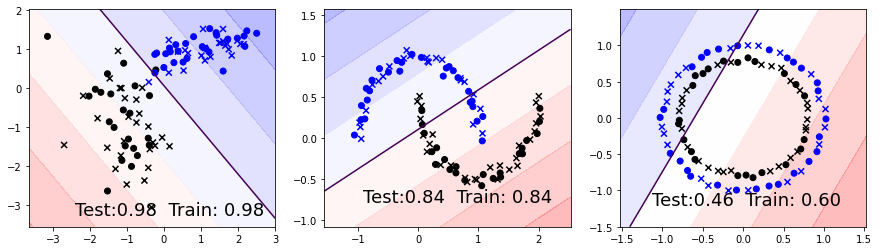

In [15]:
plot_boundaries(algorithm, DataList)

### SVM (Support vector Machine)

C:\Users\Calvin\AppData\Local\Temp/ipykernel_18188/2200264275.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(f1, f2, Z, levels=[0], linewidth=2)
C:\Users\Calvin\AppData\Local\Temp/ipykernel_18188/2200264275.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(f1, f2, Z, levels=[0], linewidth=2)
C:\Users\Calvin\AppData\Local\Temp/ipykernel_18188/2200264275.py:24: UserWarning: The following kwargs were not used by contour: 'linewidth'
  ax.contour(f1, f2, Z, levels=[0], linewidth=2)


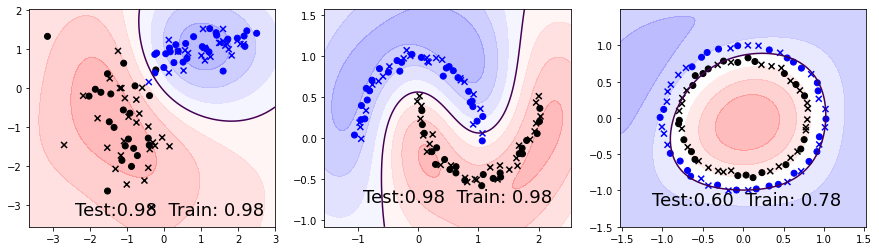

In [16]:
from sklearn.svm import SVC
algorithm = SVC(kernel='rbf', random_state=random_seed)
plot_boundaries(algorithm, DataList)

### NN: Neural Network

d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


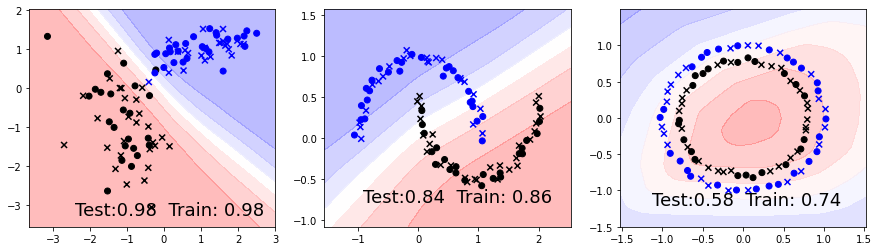

In [17]:
from sklearn.neural_network import MLPClassifier
algorithm = MLPClassifier(random_state=random_seed)
plot_boundaries(algorithm, DataList)

d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


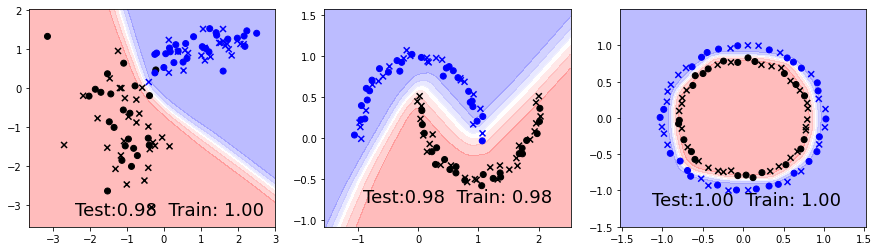

In [18]:
from sklearn.neural_network import MLPClassifier
algorithm = MLPClassifier(hidden_layer_sizes=(100, 100), random_state=random_seed)
plot_boundaries(algorithm, DataList)

### Using algorithm of Decision Tree

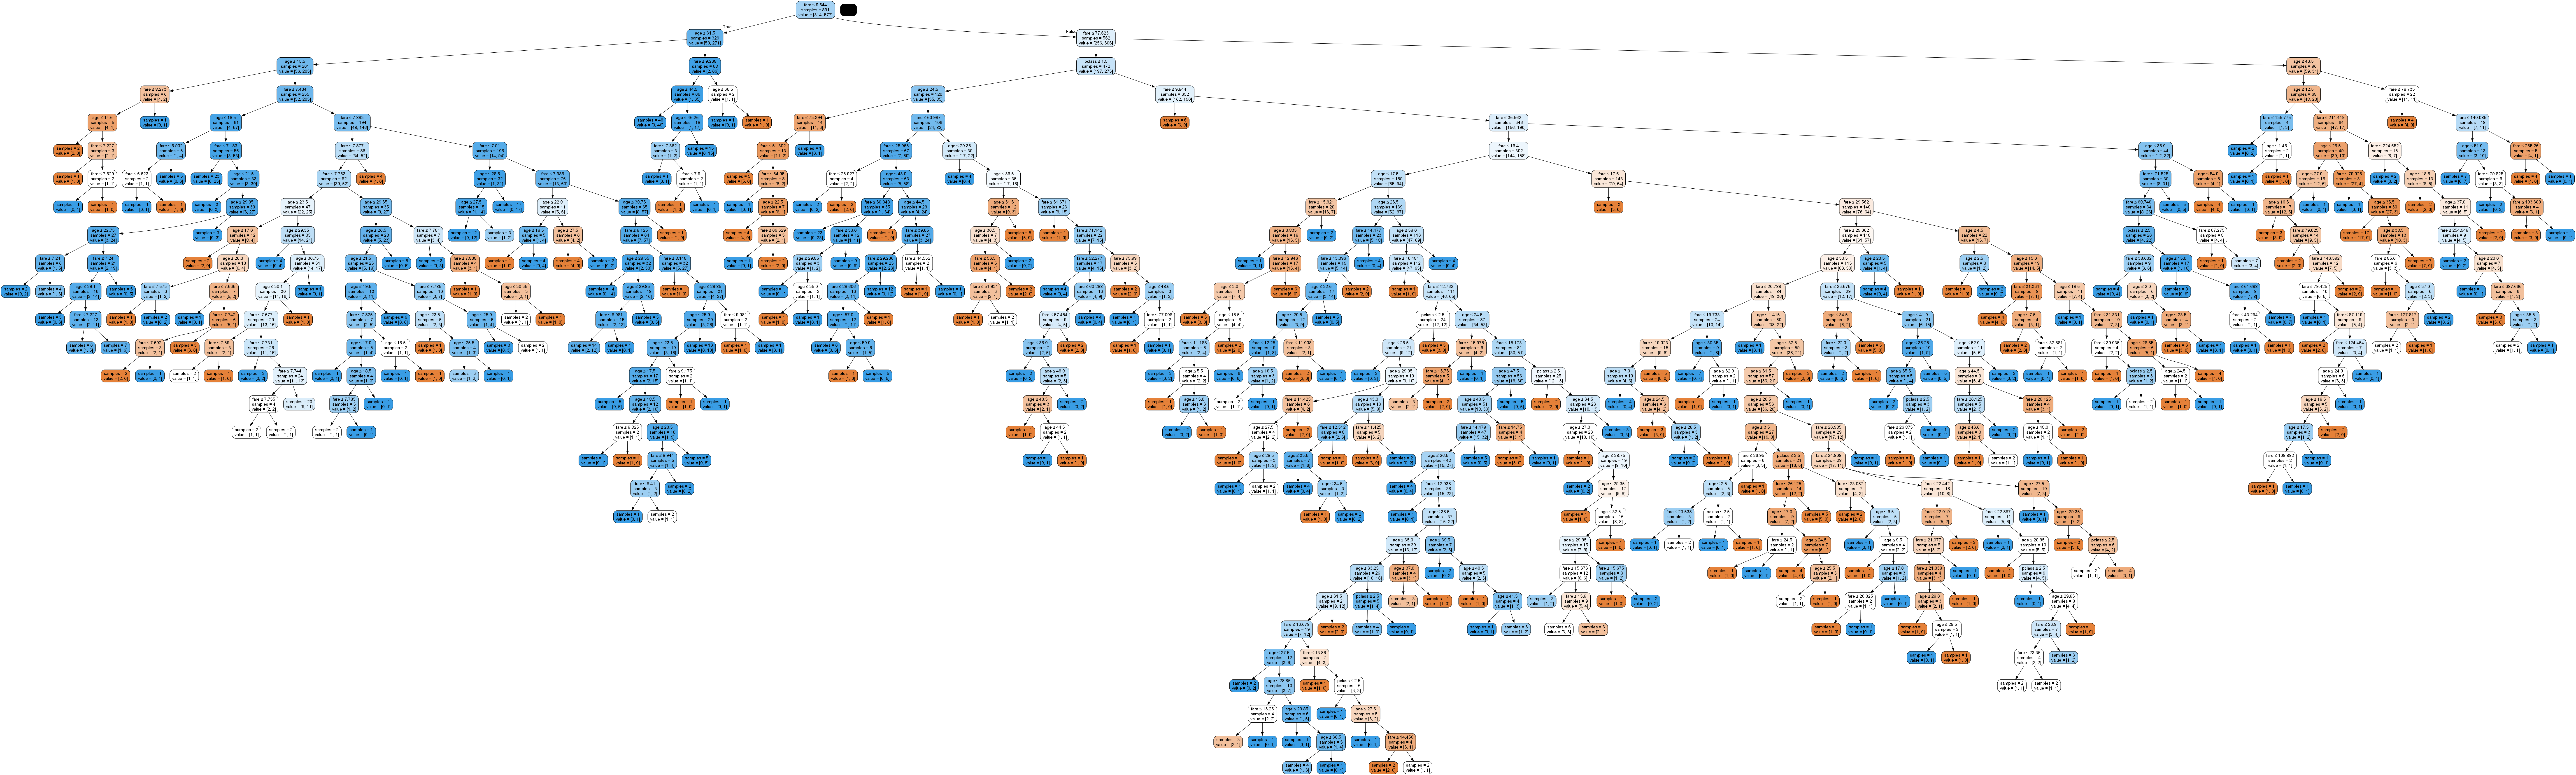

In [19]:
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state=random_seed)
algorithm.fit(X, y)

from sklearn import tree
with open('titanic-dtree.dot', mode='w') as f:
    tree.export_graphviz( algorithm, out_file=f,
        feature_names=X.columns, filled=True, rounded=True,
        special_characters=True, impurity=False, proportion=False
    )
import pydotplus
from IPython.display import Image
graph = pydotplus.graphviz.graph_from_dot_file('titanic-dtree.dot')
graph.write_png('titanic-dtree.png')
Image(graph.create_png())

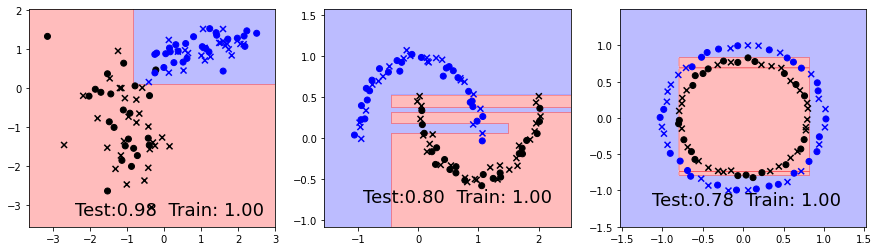

In [20]:
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(random_state=random_seed)

plot_boundaries(algorithm, DataList)

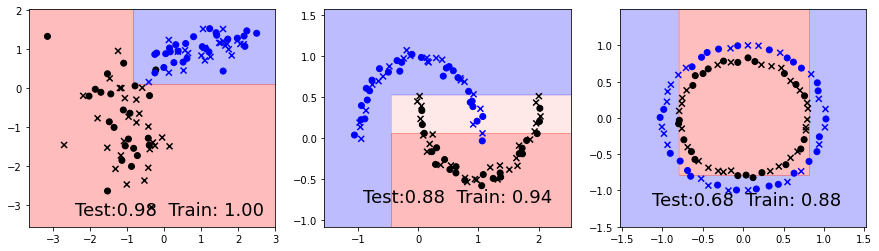

In [21]:
from sklearn.tree import DecisionTreeClassifier
algorithm = DecisionTreeClassifier(max_depth=3,
    random_state=random_seed)

plot_boundaries(algorithm, DataList)

### Using Random Forest

RandomForestClassifier(random_state=123)


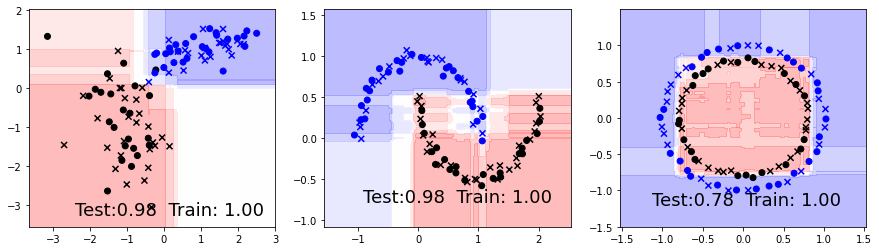

In [22]:
from sklearn.ensemble import RandomForestClassifier
algorithm = RandomForestClassifier(random_state=random_seed)

print(algorithm)

plot_boundaries(algorithm, DataList)

### Using XGBoost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)


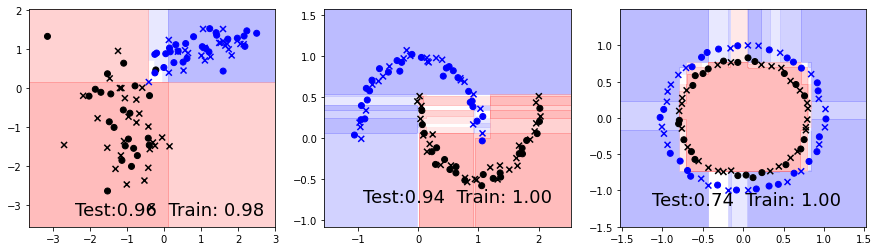

In [23]:
import xgboost
algorithm = xgboost.XGBClassifier(random_state=random_seed)

print(algorithm)

plot_boundaries(algorithm, DataList)